In [17]:
ReloadProject('deep_learning')

notebook_init.py imported and reloaded
reloaded: a3c_impl
forwarded symbol: a3c_impl
reloaded: base
forwarded symbol: base
reloaded: circular_world_env
forwarded symbol: circular_world_env
reloaded: environment_impl
forwarded symbol: environment_impl
reloaded: guided_environments
forwarded symbol: guided_environments
reloaded: gym
forwarded symbol: gym
reloaded: interval_world_env
forwarded symbol: interval_world_env
reloaded: keras
forwarded symbol: keras
reloaded: layers
forwarded symbol: layers
reloaded: logging
forwarded symbol: logging
reloaded: model_builder
forwarded symbol: model_builder
reloaded: models
forwarded symbol: models
reloaded: numpy
forwarded symbol: numpy
reloaded: numpy_util
forwarded symbol: numpy_util
reloaded: optimizers
forwarded symbol: optimizers
reloaded: other_runners
forwarded symbol: other_runners
reloaded: policy_impl
forwarded symbol: policy_impl
reloaded: qfunc_impl
forwarded symbol: qfunc_impl
reloaded: runner_extension_impl
forwarded symbol: runner_

In [98]:
states

[[array([[ 0.02318315,  0.58242713,  0.08012372, -0.42810967]]),
  array([[ 0.03937273,  0.00450853, -0.04028056, -0.01137044]]),
  array([[-1.22393435, -0.94591479, -0.10243092, -0.30642735]]),
  array([[-1.00146948, -0.89419425, -0.05840249, -0.10293925]]),
  array([[1.26898112, 0.90985765, 0.05516422, 0.0211102 ]]),
  array([[ 0.07734736,  0.38238581,  0.00808368, -0.43614473]]),
  array([[ 0.32898555,  0.54686486,  0.01403588, -0.30861282]]),
  array([[ 0.55113367,  0.40094633,  0.01053951, -0.12118495]]),
  array([[ 0.2304714 ,  0.34016697,  0.01694664, -0.02476815]]),
  array([[ 0.81349645,  1.31489248,  0.14548658, -0.00726391]]),
  array([[-0.50330022,  0.36431455, -0.05797559, -0.07904508]]),
  array([[ 1.29932225,  1.26296664,  0.08618098, -0.25595331]]),
  array([[ 0.07301362,  0.34381018, -0.01331721, -0.5010894 ]])],
 [array([[0.77688442, 0.18271239, 0.01830044, 0.45438987]]),
  array([[ 0.07219074, -0.21979337, -0.0127479 ,  0.3597516 ]]),
  array([[-0.01872194, -0.017809

In [99]:
use_states_1 = states[0][:5]
use_states_2 = states[1][:5]

In [2]:
use_states_1 = [
    np.array([[ 0.02318315,  0.58242713,  0.08012372, -0.42810967]]),
    np.array([[ 0.03937273,  0.00450853, -0.04028056, -0.01137044]]),
    np.array([[-1.22393435, -0.94591479, -0.10243092, -0.30642735]]),
    np.array([[-1.00146948, -0.89419425, -0.05840249, -0.10293925]]),
    np.array([[1.26898112, 0.90985765, 0.05516422, 0.0211102 ]])]

In [3]:
use_states_2 = [
    np.array([[0.77688442, 0.18271239, 0.01830044, 0.45438987]]),
    np.array([[ 0.07219074, -0.21979337, -0.0127479 ,  0.3597516 ]]),
    np.array([[-0.01872194, -0.01780948,  0.03422948,  0.07417699]]),
    np.array([[-0.03013217,  0.19765872,  0.05044142, -0.19798146]]),
    np.array([[ 0.04643257, -0.19702157, -0.01337837,  0.30328672]])]

## A3C

In [18]:
running_environment.ForceCpuForTheRun()

In [20]:
batch_size = 64  # used in qfunc and runner.
env = environment_impl.GymEnvironment(gym.make('CartPole-v0'))
brain = a3c_impl.A3C(
    model=a3c_impl.CreateModel(
        state_shape=env.GetStateShape(),
        action_space_size=env.GetActionSpaceSize(),
        hidden_layer_sizes=(12,),
    )
)

[19:21:55] c:\Workspace\git\deep_learning\experimental\a3c_impl.py:53 WARNING: only one A3C instance can be active; the previous instance <deep_learning.experimental.a3c_impl.A3C object at 0x000002181744F160> is now deactivated.


In [21]:
%%time
logging.ENV.debug_verbosity = 6
runner = a3c_impl.NStepExperienceRunner()
runner.AddCallback(runner_extension_impl.ProgressTracer(report_every_num_of_episodes=100))
runner.AddCallback(runner_extension_impl.ValueTracer(trace_states=use_states_1 + use_states_2, trace_actions=[0, 1]))

Wall time: 0 ns


[19:22:01] c:\Workspace\git\deep_learning\engine\runner_extension_impl.py:58 Episode 100/1000: avg_reward = 10.41, avg_steps=9.41 (over 100 episodes)
[19:22:02] c:\Workspace\git\deep_learning\engine\runner_extension_impl.py:58 Episode 200/1000: avg_reward = 9.92, avg_steps=8.92 (over 100 episodes)
[19:22:03] c:\Workspace\git\deep_learning\engine\runner_extension_impl.py:58 Episode 300/1000: avg_reward = 9.91, avg_steps=8.91 (over 100 episodes)
[19:22:04] c:\Workspace\git\deep_learning\engine\runner_extension_impl.py:58 Episode 400/1000: avg_reward = 9.88, avg_steps=8.88 (over 100 episodes)
[19:22:05] c:\Workspace\git\deep_learning\engine\runner_extension_impl.py:58 Episode 500/1000: avg_reward = 9.83, avg_steps=8.83 (over 100 episodes)
[19:22:07] c:\Workspace\git\deep_learning\engine\runner_extension_impl.py:58 Episode 600/1000: avg_reward = 9.99, avg_steps=8.99 (over 100 episodes)
[19:22:08] c:\Workspace\git\deep_learning\engine\runner_extension_impl.py:58 Episode 700/1000: avg_reward

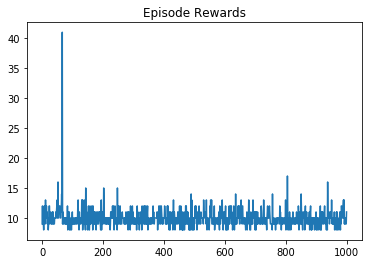

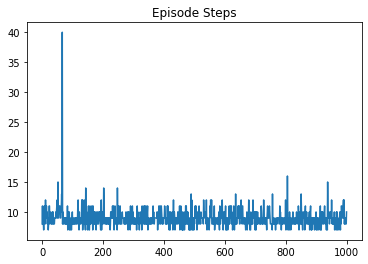

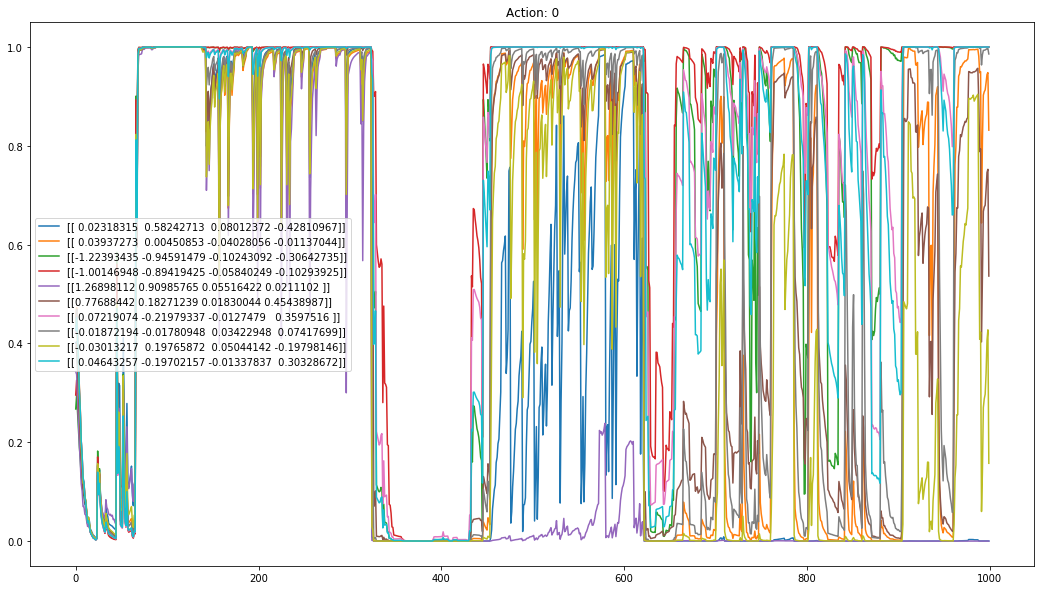

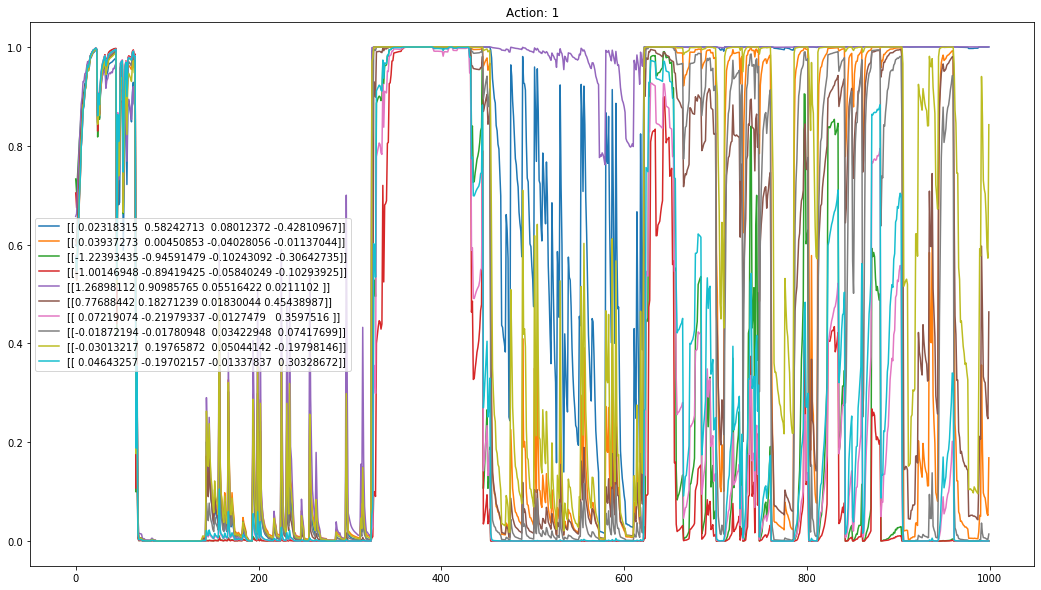

Wall time: 13.1 s


In [22]:
%%time
runner.Run(env=env, brain=brain, policy=policy_impl.GreedyPolicyWithRandomness(epsilon=0.1), num_of_episodes=1000)